<a href="https://colab.research.google.com/github/NguyenDucAnforwork/NLP_Lab_20242/blob/main/NLP_DSAI_20242_Syntax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IT4772E - Natural Language Processing**

*Semester 2024.2 - DSAI*

# **Lab 01: Syntactic Parsing**
#### Tutor: [Minh N. Ta](https://tnminh.com)
-------

Requirements (run first)

In [ ]:
%%capture
! pip install nltk stanza

In [ ]:
%%capture
import nltk
from nltk.parse import EarleyChartParser, ChartParser, ViterbiParser
from nltk.grammar import CFG
from nltk.tree import Tree
import stanza
stanza.download('en')
nlp = stanza.Pipeline('en')

## **1. Remind about some basic algorithms**

### **1.1. Earley's Algorithm**

In [ ]:
def earley_parse(grammar_str, sentence):
    # Define the context-free grammar
    grammar = CFG.fromstring(grammar_str)

    # Create the Earley Chart Parser
    parser = EarleyChartParser(grammar)

    # Parse the sentence and return the resulting tree(s)
    trees = list(parser.parse(sentence))

    return trees

grammar = """
    S -> NP VP
    NP -> Det N | N
    VP -> V NP | V
    Det -> 'the' | 'a'
    N -> 'cat' | 'dog'
    V -> 'chased' | 'barked'
"""

sentence = ['the', 'cat', 'chased', 'a', 'dog']

trees = earley_parse(grammar, sentence)
for tree in trees:
    tree.pretty_print()


### **1.2. CKY Algorithm**

#### 1.2.1. Implementation of CKY Algorithm

In [ ]:
def cky_parse(grammar_rules, sentence):
    n = len(sentence)
    table = [[set() for _ in range(n)] for _ in range(n)]
    backpointers = [[[] for _ in range(n)] for _ in range(n)]

    # Fill the table for terminals
    for i, word in enumerate(sentence):
        for lhs, productions in grammar_rules.items():
            if [word] in productions:
                table[i][i].add(lhs)
                backpointers[i][i].append((lhs, word))

    # Fill the table for non-terminals
    for length in range(2, n + 1):
        for i in range(n - length + 1):
            j = i + length - 1
            for k in range(i, j):
                for lhs, productions in grammar_rules.items():
                    for production in productions:
                        if len(production) == 2 and production[0] in table[i][k] and production[1] in table[k+1][j]:
                            table[i][j].add(lhs)
                            backpointers[i][j].append((lhs, k, production[0], production[1]))

    # Generate parse trees
    def build_tree(i, j, symbol):
        if i == j:
            return Tree(symbol, [sentence[i]])
        for lhs, k, left, right in backpointers[i][j]:
            if lhs == symbol:
                return Tree(lhs, [build_tree(i, k, left), build_tree(k + 1, j, right)])
        return None

    # Extract parse trees for S (start symbol)
    trees = [build_tree(0, n - 1, 'S')] if 'S' in table[0][n - 1] else []
    return trees

grammar = {
    'S': [['NP', 'VP']],
    'NP': [['Det', 'N'], ['N']],
    'VP': [['V', 'NP'], ['V']],
    'Det': [['the'], ['a']],
    'N': [['cat'], ['dog']],
    'V': [['chased'], ['barked']]
}

sentence = ['the', 'cat', 'chased', 'a', 'dog']

cky_trees = cky_parse(grammar, sentence)

for tree in cky_trees:
    tree.pretty_print()

#### 1.2.2. CKY using NLTK library

In [ ]:
def cky_parse(grammar_str, sentence):
    # Define the context-free grammar in CNF
    grammar = CFG.fromstring(grammar_str)

    # Create the CKY Parser
    parser = ChartParser(grammar)

    # Parse the sentence and return the resulting tree(s)
    trees = list(parser.parse(sentence))

    return trees

grammar = """
    S -> NP VP
    NP -> Det N | N
    VP -> V NP | V
    Det -> 'the' | 'a'
    N -> 'cat' | 'dog'
    V -> 'chased' | 'barked'
"""

sentence = ['the', 'cat', 'chased', 'a', 'dog']

# TODO

## **2. Hands-On Labs on Syntactic Parsing**

**General requirements:** Using NLTK library for syntactic parsing

#### Task 1: Given an example of CFG. Create a grammar parser for the structure

```python
S -> NP VP
NP -> Det N | Q N | N | Q N ADJ | Q N N | Q N N ADJ
VP -> ADV V NP PP | ADV V NP | V NP PP | V NP | ADV V PP | V PP | ADV V | V
PP -> P NP
VP -> V S

Det -> 'Nam' | 'Lan' | 'thư_viện'
N -> 'Nam' | 'Lan' | 'sách' | 'cuốn' | 'thư_viện'
V -> 'đọc' | 'thích' | 'tặng' | 'mua' | 'thấy' | 'ở' | 'có'
ADV -> 'đang' | 'mới'
P -> 'ở'
Q -> 'hai'
ADJ -> 'mới'
```

In [ ]:
# Your code goes here

#### Task 2: Use the above parser to parse the sentences:

```
Nam đang đọc sách ở thư viện
Nam thích đọc sách
Nam tặng Lan sách
Nam thích ở thư viện
Nam có hai cuốn sách mới
Nam mới mua hai cuốn sách
```

In [ ]:
# Your code goes here

#### Task 3: Use the above parser to parse the sentence:
```
Nam thấy Lan ở thư_viện
```
*NB: The sentence may have more than one parsing way.*

In [ ]:
# Your code goes here

#### Task 4: Parse the sentence with probabilistic parsing (PCFG):

```
Nam thấy Lan ở thư_viện
```

Given this grammar structure:
```python
S -> NP VP [1.0]
VP -> V NP PP [0.6] | V NP [0.4]
PP -> P NP [1.0]

NP -> 'Nam' [0.5] | 'Lan' [0.2] | 'thư_viện' [0.3]
V -> 'thấy' [1.0]
P -> 'ở' [1.0]
```

In [ ]:
# Your code goes here

## **3. Hands-On Labs on Parsing the Sentence**

#### Task 1: Using `stanza` to parse the sentence:
```
My NLP professor is a good teacher.
```

In [ ]:
def parse_processing(string):
    # Use Stanza to analyze the sentence
    doc = nlp(string)
    # Extract the first sentence from the text
    tokens = doc.sentences[0]

    # Function to construct a tree based on syntactic structure
    # Builds a dependency tree using `head` and `id`
    def build_tree(root_token):
        # Create a node for the current word
        word = root_token['text']
        deprel = root_token['deprel']

        # Find all tokens that depend on `root_token`
        children_tokens = [token for token in tokens.to_dict() if token['head'] == root_token['id']]
        # Recursively build subtrees for child tokens (if any)
        children = [build_tree(child) for child in children_tokens]

        # Return the constructed tree
        return Tree(deprel, [Tree(word, children)] if children else [word])

    # Identify the root word (the one with `head == 0`) to start building the tree
    root_token = next(token for token in tokens.to_dict() if token['head'] == 0)
    tree = build_tree(root_token)

    return tree

In [ ]:
# Your code goes here

#### Task 2: Extract Noun Phrase and Verb Phrase from the above sentence

In [ ]:
def getNP_VP(tree):
    np, vp = None, None
    # Check if tree has at least 1 subtree
    if isinstance(tree, Tree) and len(tree) > 0:
        # Get first subtree
        main_subtree = tree[0]
        if isinstance(main_subtree, Tree):
            vp = main_subtree
            for subtree in main_subtree:
                if isinstance(subtree, Tree):  # Check if the subtree is a tree
                    if subtree.label() == 'nsubj' or subtree.label()== 'dobj':
                        np = subtree
                    elif subtree.label() == 'cop':
                        vp = subtree
    return np, vp


# Extract NP and VP from the given tree
NP, VP = getNP_VP(tree)

# Print the extracted phrases
if NP:
    NP.pretty_print()
else:
    print("No NP found.")

if VP:
    VP.pretty_print()
else:
    print("No VP found.")


#### Task 3: Determine the grammatical person of the subject, given that:

```python
subject_types = {
    'i': 1,      # First-person singular
    'we': 2,     # First-person plural
    'you': 3,    # Second-person (singular/plural)
    'he': 4,     # Third-person singular
    'she': 4,
    'it': 4,
    'they': 5    # Third-person plural
}
```

In [ ]:
# Your code goes here

## **4. In-class Example**

### Task 1: Build a parser for this sentence (both CFG and PCFG)

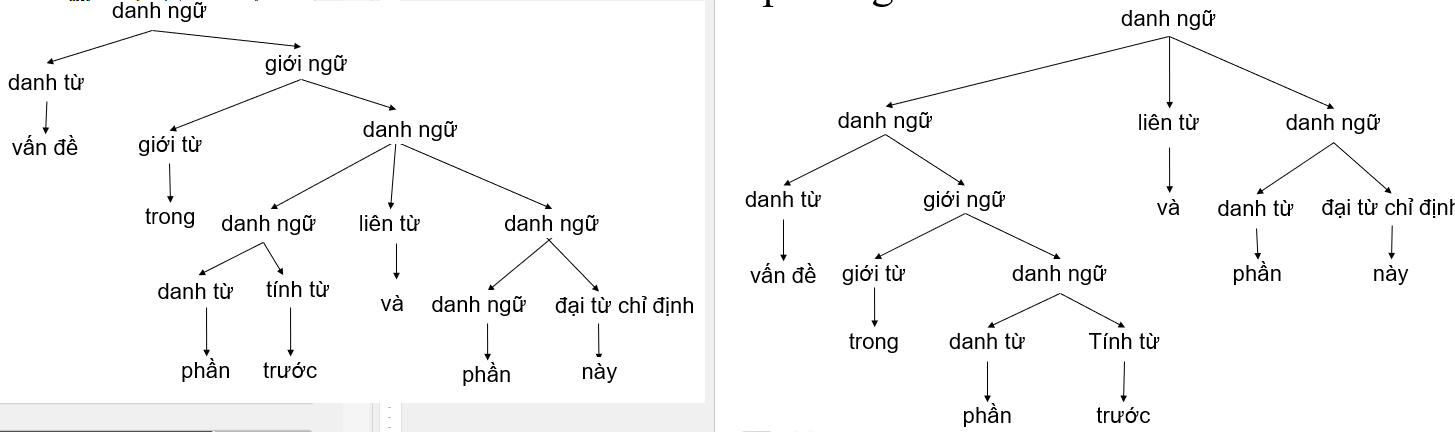

**Requirements:**

* CFG parser must have 2 ways to understand.
* PCFG parser must have 1 way to understand.

*Hint: Some multi-syllable words should use underscore (_) instead of space.*

CFG parser

In [ ]:
# Your code goes here

PCFG parser

In [ ]:
# Your code goes here

### Task 2: Build a parser for this sentence:

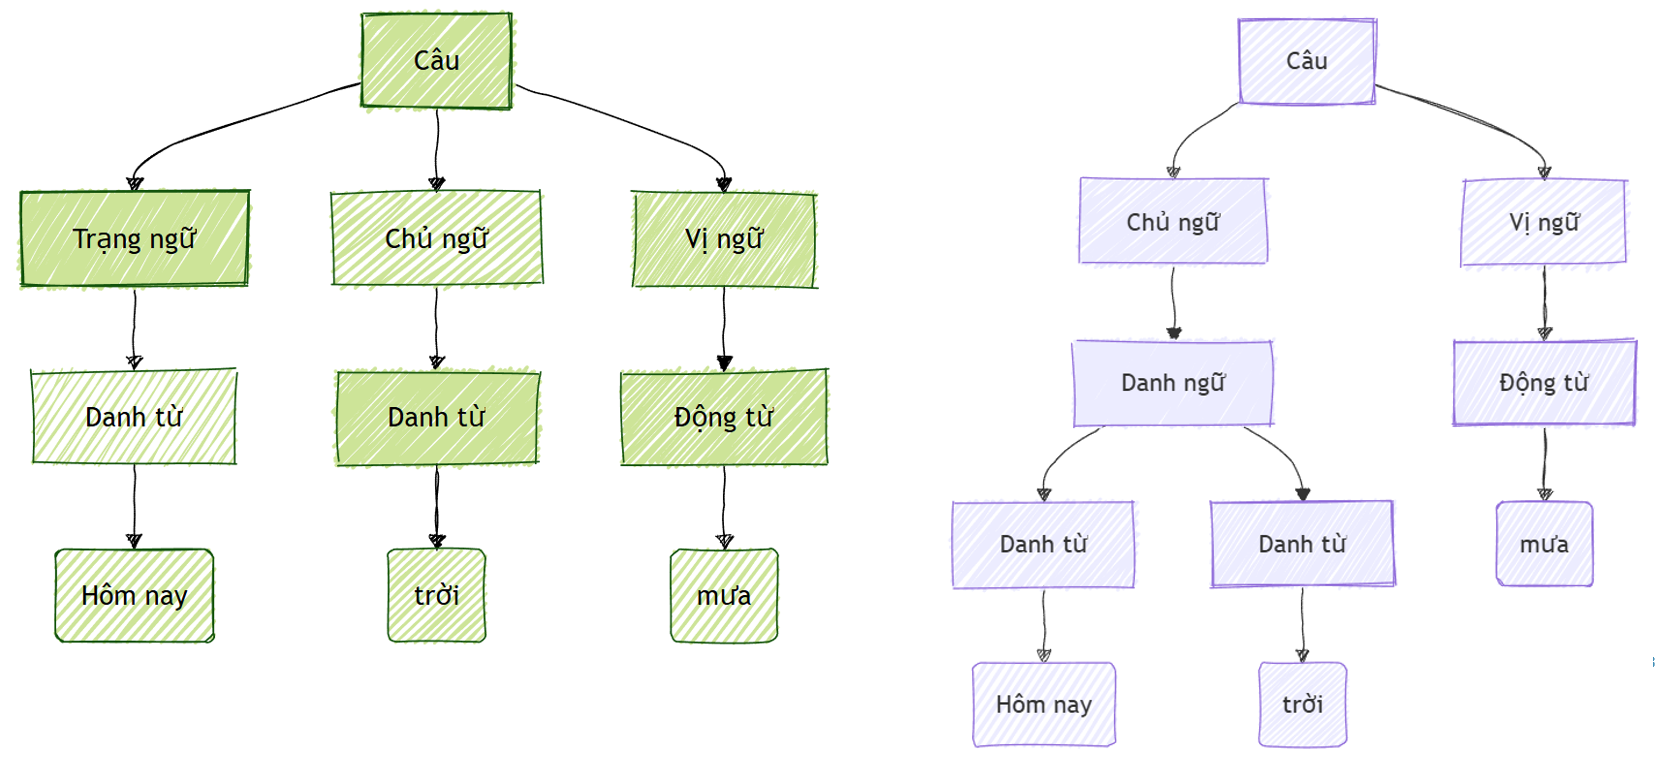

In [ ]:
# Your code goes here

## **5. Homework**

### Task: Create a parser to parse these sentences:

```
Cô_gái yêu chàng_trai hơn mẹ cô_gái.
Mẹ bảo cô_gái yêu chàng_trai.
Chàng_trai yêu cô_gái hơn mẹ cô_gái.
Cô_gái yêu mẹ.
Mẹ cô_gái rất quý chàng_trai.
```

*NB: Some sentences has more than one parsing way.*

Hint:
* The corpus:
```python
Comp -> 'hơn'
Adv -> 'rất'
V -> 'yêu' | 'bảo' | 'quý'
N -> 'cô_gái' | 'chàng_trai' | 'mẹ'
```
* Some rules:
```python
VP -> VP Comp NP
VP -> Adv V NP
NP -> NP Comp NP
```

In [ ]:
# Your codes goes here

# **The End**

### References:


1.   [Stanford CoreNLP](https://stanfordnlp.github.io/CoreNLP/)
2.   [NLTK: Sample usage for parse](https://www.nltk.org/howto/parse.html)
<br><br>
----------------
Made with ♥ by Minh N. Ta.